# cmeAnalysis Montage Generation

Example notebook to show how to generate a list of unique cell identifiers ('addresses') for using the MATLAB cmeAnalysis Montage Generation script. The parameters used here to filter CME sites is not the same as that used in the paper.

In [1]:
def filter_for_ccps(tracks_to_check,
                    minimum_dnm2_counts=3,
                    sig_pval_cutoff=0.01,
                    minimum_lifetime=20,
                    maximum_lifetime=180,
                    initial_msd_threshold=0.02,
                    pixel_size=0.108):
    
    """return tracks that are sufficiently DNM2 rich, not too long or not too short, and aren’t too speedy"""
    tracks_kept = [] # the CCPs we’re keeping
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        track_lifetime = return_track_attributes.return_track_lifetime(tracks_to_check, i)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][1]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_dnm2_repeats = max_1s
        initial_msd = tracks_to_check[i][index_dictionary['index_MotionAnalysis']][0][0][1][0][0]
        initial_msd = pixel_size**2 * initial_msd
       
        if track_lifetime >= minimum_lifetime and \
           track_lifetime <= maximum_lifetime and \
           max_dnm2_repeats >= minimum_dnm2_counts and \
           initial_msd <= initial_msd_threshold:
            tracks_kept.append(tracks_to_check[i])
    return tracks_kept

In [2]:
def filter_for_ccps_with_nef(tracks_to_check,
                    minimum_nef_counts=3,
                    sig_pval_cutoff=0.01):
    
    """return tracks that are sufficiently nef rich, not too long or not too short, and aren’t too speedy"""
    tracks_kept = [] # the CCPs we’re keeping
    tracks_discarded = []
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][2]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_nef_repeats = max_1s
    
       
        if max_nef_repeats >= minimum_nef_counts:
            tracks_kept.append(tracks_to_check[i])
        else:
            tracks_discarded.append(tracks_to_check[i])
#     print(len(tracks_kept), len(tracks_discarded))
    return tracks_kept, tracks_discarded

In [3]:
def index_filter_for_ccps(tracks_to_check,
                          presort_index,
                          minimum_dnm2_counts=3,
                          sig_pval_cutoff=0.01,
                          minimum_lifetime=20,
                          maximum_lifetime=180,
                          initial_msd_threshold=0.02,
                          pixel_size=0.108):
                          
                            
    
    """return tracks that are sufficiently DNM2 rich, not too long or not too short, and aren’t too speedy"""
    index_kept = [] # the index of CCP's we’re keeping
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        track_lifetime = return_track_attributes.return_track_lifetime(tracks_to_check, i)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][1]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_dnm2_repeats = max_1s
        initial_msd = tracks_to_check[i][index_dictionary['index_MotionAnalysis']][0][0][1][0][0]
        initial_msd = pixel_size**2 * initial_msd
       
        if track_lifetime >= minimum_lifetime and \
           track_lifetime <= maximum_lifetime and \
           max_dnm2_repeats >= minimum_dnm2_counts and \
           initial_msd <= initial_msd_threshold:
            index_kept.append(presort_index[i])
            
    return index_kept

In [4]:
def index_filter_for_ccps_with_nef(tracks_to_check,
                                   presort_index,
                                   minimum_nef_counts=3,
                                   sig_pval_cutoff=0.01):
    
    """return tracks that are sufficiently nef rich, not too long or not too short, and aren’t too speedy"""
    index_kept = [] # the index of CCPs we’re keeping
    index_discarded = [] # the index of CCPs we're discarding
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][2]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_nef_repeats = max_1s
    
       
        if max_nef_repeats >= minimum_nef_counts:
            index_kept.append(presort_index[i])
        else:
            index_discarded.append(presort_index[i])
#     print(len(tracks_kept), len(tracks_discarded))
    return index_kept, index_discarded

In [5]:
# Function for comparing two lists to eliminate all items in list two present in list 1. Useful for deciding filtering parameters. 

def remove(l1, l2):
    r = set()
    r = set(l1).difference(set(l2))
    r = list(r)
    
    return r

In [ ]:
# Function for detecting frame positions for the longest statistically significant consecutive detection of Nef.
# Returns these frame positions as a list with same index as tracks. 
def nef_consecutive_coloc_frametimes(tracks_to_check, 
                                     sig_pval_cutoff=0.01):
    frame_starts = []
    frame_ends = []
    
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][2]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
    
        #code for detecting which tuple has highest # of consecutive detections. 
        #If there are multiple tuples with the highest number, the tuple that appears latest on the list is selected
        nef_frame = max([x for x, y in enumerate(repeated_indices) 
                         if (repeated_indices[x][1] == max(repeated_indices)[1] 
                         and repeated_indices[x][0] == 1)])

        for k in range(nef_frame):
            start[i] += repeated_indices[i][1]

        end[i] = start[i] + repeated_indices[nef_frame][1]
        
        frame_starts.append(start[i])
        frame_ends.append(end[i])
        
    return frame_starts, frame_ends

In [ ]:
def mean_distance_filter(tracks_to_check,
                             channel_0,
                             channel_1,
                             frame_starts,
                             frame_ends):
    tracks_kept = []
    tracks_discarded = []
    
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        xpos_c0 = tracks_to_check[i][index_dictionary['index_x_pos']][channel_0]
        ypos_c0 = tracks_to_check[i][index_dictionary['index_y_pos']][channel_0]
        
        xpos_c1 = tracks_to_check[i][index_dictionary['index_x_pos']][channel_1]
        ypos_c1 = tracks_to_check[i][index_dictionary['index_y_pos']][channel_1]
        
        c0_displacements = []
        c1_displacements = []

        for j in range(frame_starts[i], frame_ends[i]):
            c0_displacements.append(np.sqrt((xpos_c0[j]-xpos_c0[j-1])**2 + (ypos_c0[j]-ypos_c0[j-1])**2))
            c1_displacements.append(np.sqrt((xpos_c1[j]-xpos_c1[j-1])**2 + (ypos_c1[j]-ypos_c1[j-1])**2))
        
        c0_md = (np.sum(c0_displacements)/len(c0_displacements))
        c1_md = (np.sum(c1_displacements)/len(c1_displacements))
        
        #compare mean displacement of c0 and c1 to determine if tracks are kept
        if c0_md >= c1_md*0.4:
            tracks_kept.append(tracks_to_check[i])
        else:
            tracks_discarded.append(tracks_to_check[i])
            
    return tracks_kept, tracks_discarded

In [6]:
# set a path to the prefix of the pooled working directory with all of the data 
unique_user_path_notebook = 'C:/Users/yuyu2/Dropbox/Drubin_Hurley_Lab/Analysis Code/20210406_cmeAnalysisPostProcessingPythonScripts'
unique_user_index_outputs = 'C:/Users/yuyu2/Desktop/colocalization_filter/LLAA/'

# import all necessary Python modules

In [7]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import Image
import itertools
import scipy.interpolate as interpolate
import re
import seaborn as sns
import random

#sys.path.append(unique_user_path_notebook+'/cmeAnalysisPostProcessingPythonScripts') # add custom Python scripts to the local path
import display_tracks
import merge_tools
import feature_extraction_with_buffer
import generate_index_dictionary
import return_track_attributes

# batch load nef tracks

In [8]:
tracks_path = 'E:/HIVNefCmeProject/AP2DNM2NA7Nef_mutant_segment_good_1/20211111'
track_directories = os.listdir(tracks_path)

In [9]:
movie_number = []
cell_number = []
cell_condition = []
all_tracks = []

# 0 is AP2 DNM2, 1 is NL4-3 WT, 2 is NL4-3 D123A, 3 is NL4-3 LLAA
condition_map = {'1':0,
                 '2':0,
                 '3':0,
                 '4':1,
                 '5':1,
                 '6':1,
                 '7':2,
                 '8':2,
                 '9':2,
                 '10':3,
                 '11':3,
                 '12':3
                }

for cell in track_directories:
    split = re.split('-|_',cell)
    movie_number.append(split[0][4:])
    cell_number.append(split[1])
    cell_condition.append(condition_map[movie_number[-1]])
    all_tracks.append(display_tracks.load_tracks(tracks_path+'/'+cell+'/Ch1/Tracking/ProcessedTracks.mat'))


In [10]:
index_dictionary = generate_index_dictionary.return_index_dictionary()


In [11]:
all_tracks[43][3][index_dictionary['index_catIdx']][0][0]

7

# Filtering Nef tracks

In [12]:
valid_tracks = []

for tracks in all_tracks:
    
    valid_tracks.append(display_tracks.remove_tracks_by_criteria(tracks, track_category=[1]))

The number of tracks returned: 223

The number of tracks returned: 474

The number of tracks returned: 435

The number of tracks returned: 223

The number of tracks returned: 326

The number of tracks returned: 309

The number of tracks returned: 252

The number of tracks returned: 218

The number of tracks returned: 225

The number of tracks returned: 155

The number of tracks returned: 354

The number of tracks returned: 247

The number of tracks returned: 64

The number of tracks returned: 101

The number of tracks returned: 158

The number of tracks returned: 73

The number of tracks returned: 154

The number of tracks returned: 87

The number of tracks returned: 38

The number of tracks returned: 172

The number of tracks returned: 145

The number of tracks returned: 80

The number of tracks returned: 217

The number of tracks returned: 163

The number of tracks returned: 154

The number of tracks returned: 106

The number of tracks returned: 128

The number of tracks returned: 15

In [13]:
filtered_valid_tracks = []

for tracks in valid_tracks:
    
    tempFilteredTracks = filter_for_ccps(tracks,
                         minimum_dnm2_counts=3,
                         sig_pval_cutoff=0.01,
                         minimum_lifetime=10,
                         maximum_lifetime=180,
                         initial_msd_threshold=0.02,
                         pixel_size=0.108)
    print(len(tempFilteredTracks))
    filtered_valid_tracks.append(tempFilteredTracks)


  0%|                                                                                          | 0/158 [00:00<?, ?it/s]

56
59
72
33
39
27
25
35
47
27
72
22
15
30


100%|█████████████████████████████████████████████████████████████████████████████| 138/138 [00:00<00:00, 33445.85it/s]


33
24
39
15
16
29
28
19
28
35
22
30
40
22
23
19
11
5
33
13
18


  0%|                                                                                          | 0/141 [00:00<?, ?it/s]

18
38
37
18
20
74
25
34
38
43
31
43
19


  0%|                                                                                          | 0/322 [00:00<?, ?it/s]

29
29
26
30
27
13
32
34
19
44
9
22
19
15
59
18
8


  0%|                                                                                          | 0/233 [00:00<?, ?it/s]

53
47
7
33
17
29
41
44
26


  0%|                                                                                          | 0/226 [00:00<?, ?it/s]

46
24
4
6
28
26
11
17
7
32
28


100%|█████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 18048.93it/s]

39
55
36
20
39
24
20
38
28
34



100%|█████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 35718.13it/s]

12
17
9
37
23
33
52


In [14]:
filtered_valid_tracks_nef_positive = []
filtered_valid_tracks_nef_negative = []

for tracks in filtered_valid_tracks:
    
    nef_pos, nef_neg = filter_for_ccps_with_nef(tracks,
                                                minimum_nef_counts=4,
                                                sig_pval_cutoff=0.01)
    
    num_neg = len(nef_neg)
    num_pos = len(nef_pos)
#     print(len(nef_neg))
    filtered_valid_tracks_nef_positive.append(nef_pos)
    filtered_valid_tracks_nef_negative.append(nef_neg)
    #print('fraction nef positive', num_pos/(num_pos + num_neg))

100%|███████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 29714.42it/s]


# Creating dataframe with ctrl and nef tracks

Dataframe for Nef tracks

In [25]:
labels_lifetimes_intensities = []

lifetimes = []
max_int_ap2 = []
max_int_dnm2 = []
max_int_nef = []
labels = []
nef_status = []
max_consecutive_dnm2 = []
max_consecutive_nef = []

for cond, tracks in enumerate(filtered_valid_tracks_nef_positive):

    features_nef_pos = feature_extraction_with_buffer.TrackFeatures(tracks) # an instance of a to-be feature matrix of tracks
    features_nef_pos.add_features(['lifetime', 'max_int_ch0', 'max_int_ch1', 'max_int_ch2', 'max_consecutive_significant_ch1', 'max_consecutive_significant_ch2']) # set the features to be extracted
    features_nef_pos.extract_features() # extract all features
    features_nef_pos = features_nef_pos.feature_matrix # feature matrix for all tracks
    
    lifetimes.append(features_nef_pos[:,0])
    max_int_ap2.append(features_nef_pos[:,1])
    max_int_dnm2.append(features_nef_pos[:,2])
    max_int_nef.append(features_nef_pos[:,3])
    max_consecutive_dnm2.append(features_nef_pos[:,4])
    max_consecutive_nef.append(features_nef_pos[:,5])
    
    #print(features_nef_pos.shape)
    labels.append([cell_condition[cond] for i in range(features_nef_pos.shape[0])])
    nef_status.append([1 for i in range(features_nef_pos.shape[0])])
    
for cond, tracks in enumerate(filtered_valid_tracks_nef_negative):

    features_nef_pos = feature_extraction_with_buffer.TrackFeatures(tracks) # an instance of a to-be feature matrix of tracks
    features_nef_pos.add_features(['lifetime', 'max_int_ch0', 'max_int_ch1', 'max_int_ch2', 'max_consecutive_significant_ch1', 'max_consecutive_significant_ch2']) # set the features to be extracted
    features_nef_pos.extract_features() # extract all features
    features_nef_pos = features_nef_pos.feature_matrix # feature matrix for all tracks
    
    lifetimes.append(features_nef_pos[:,0])
    max_int_ap2.append(features_nef_pos[:,1])
    max_int_dnm2.append(features_nef_pos[:,2])
    max_int_nef.append(features_nef_pos[:,3])
    max_consecutive_dnm2.append(features_nef_pos[:,4])
    max_consecutive_nef.append(features_nef_pos[:,5])
    
    labels.append([cell_condition[cond] for i in range(features_nef_pos.shape[0])])    
    nef_status.append([0 for i in range(features_nef_pos.shape[0])])

In [26]:
lifetimes = [lifetimes[i][j] for i in range(len(lifetimes)) for j in range(len(lifetimes[i]))]
max_int_ap2 = [max_int_ap2[i][j] for i in range(len(max_int_ap2)) for j in range(len(max_int_ap2[i]))]
max_int_dnm2 = [max_int_dnm2[i][j] for i in range(len(max_int_dnm2)) for j in range(len(max_int_dnm2[i]))]
max_int_nef = [max_int_nef[i][j] for i in range(len(max_int_nef)) for j in range(len(max_int_nef[i]))]
max_consecutive_dnm2 = [max_consecutive_dnm2[i][j] for i in range(len(max_consecutive_dnm2)) for j in range(len(max_consecutive_dnm2[i]))]
max_consecutive_nef = [max_consecutive_nef[i][j] for i in range(len(max_consecutive_nef)) for j in range(len(max_consecutive_nef[i]))]

labels = [labels[i][j] for i in range(len(labels)) for j in range(len(labels[i]))]
nef_status = [nef_status[i][j] for i in range(len(nef_status)) for j in range(len(nef_status[i]))]

In [27]:
array_features = np.array([lifetimes, max_int_ap2, max_int_dnm2, max_int_nef, max_consecutive_dnm2, max_consecutive_nef, labels, nef_status]).T

In [28]:
df_features = pd.DataFrame(data=array_features, columns=['lifetime', 'max_ap2', 'max_dnm2', 'max_int_nef', 'max_consecutive_dnm2', 'max_consecutive_nef', 'condition', 'nef_status'])

In [29]:
df_features

,lifetime,max_ap2,max_dnm2,max_int_nef,max_consecutive_dnm2,max_consecutive_nef,condition,nef_status
0,76.0,1002.418637,1571.506706,123.489914,24.0,6.0,0.0,1.0
1,50.0,332.091950,911.280229,59.032462,17.0,4.0,0.0,1.0
2,116.0,282.936646,824.382875,150.863316,28.0,35.0,0.0,1.0
3,150.0,2011.157865,4153.476892,396.230143,30.0,10.0,3.0,1.0
4,106.0,872.546933,2331.342786,266.703628,31.0,11.0,3.0,1.0
...,...,...,...,...,...,...,...,...
2969,22.0,145.427518,675.273584,57.040945,9.0,1.0,2.0,0.0
2970,14.0,80.373554,394.690081,96.208011,4.0,2.0,2.0,0.0
2971,14.0,126.294117,612.322442,59.268433,5.0,2.0,2.0,0.0
2972,12.0,283.988454,1529.386509,20.106778,14.0,0.0,2.0,0.0


# Indexing. Valid tracks, filtered tracks, and nef +/- tracks

In [15]:
valid_index = []

for i in range(len(all_tracks)):
    valid_index.append([])
    for k in range(len(all_tracks[i])):        
        if all_tracks[i][k][index_dictionary['index_catIdx']][0][0] == 1:
            valid_index[i].append(k+1)

In [17]:
filtered_valid_index = []
for i in range(len(valid_tracks)):
    filtered_address = index_filter_for_ccps(valid_tracks[i],
                                             valid_index[i],
                                             minimum_dnm2_counts=3,
                                             sig_pval_cutoff=0.01,
                                             minimum_lifetime=10,
                                             maximum_lifetime=180,
                                             initial_msd_threshold=0.02,
                                             pixel_size=0.108)

    filtered_valid_index.append(filtered_address)

100%|█████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 10401.00it/s]


In [18]:
nef_pos_filtered_valid_index = []
nef_neg_filtered_valid_index = []

for i in range(len(filtered_valid_tracks)):
    
    nef_pos_address, nef_neg_address = index_filter_for_ccps_with_nef(filtered_valid_tracks[i],
                                                                      filtered_valid_index[i],
                                                                      minimum_nef_counts=3,
                                                                      sig_pval_cutoff=0.01)
    nef_pos_filtered_valid_index.append(nef_pos_address)
    nef_neg_filtered_valid_index.append(nef_neg_address)

100%|███████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 32225.74it/s]


In [170]:
filtered_no_dnm2_valid_index = []
for i in range(len(valid_tracks)):
    filtered_address = index_filter_for_ccps(valid_tracks[i],
                                             valid_index[i],
                                             minimum_dnm2_counts=0,
                                             sig_pval_cutoff=0.01,
                                             minimum_lifetime=5,
                                             maximum_lifetime=180,
                                             initial_msd_threshold=0.02,
                                             pixel_size=0.108)

    filtered_no_dnm2_valid_index.append(filtered_address)

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 24493.02it/s]


In [171]:
nef_pos_filtered_no_dnm2_valid_index = []
nef_neg_filtered_no_dnm2_valid_index = []

for i in range(len(filtered_no_dnm2_valid_tracks)):
    
    nef_pos_address, nef_neg_address = index_filter_for_ccps_with_nef(filtered_no_dnm2_valid_tracks[i],
                                                                      filtered_no_dnm2_valid_index[i],
                                                                      minimum_nef_counts=3,
                                                                      sig_pval_cutoff=0.01)
    nef_pos_filtered_no_dnm2_valid_index.append(nef_pos_address)
    nef_neg_filtered_no_dnm2_valid_index.append(nef_neg_address)

100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 14986.79it/s]


In [94]:
valid_index[0]

[4,
 5,
 11,
 12,
 14,
 17,
 19,
 21,
 25,
 26,
 27,
 31,
 33,
 35,
 37,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 68,
 69,
 71,
 75,
 76,
 86,
 87,
 89,
 90,
 91,
 94,
 95,
 97,
 101,
 102,
 103,
 105,
 106,
 107,
 109,
 113,
 114,
 115,
 116,
 119,
 123,
 127,
 133,
 135,
 136,
 138,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 156,
 157,
 158,
 159,
 160,
 161,
 163,
 165,
 173,
 176,
 178,
 179,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 198,
 201,
 204,
 205,
 207,
 208,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 218,
 219,
 220,
 221,
 223,
 224,
 225,
 226,
 239,
 241,
 243,
 247,
 248,
 250,
 253,
 261,
 262,
 265,
 270,
 272,
 274,
 279,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 301,
 302,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 332,
 333,
 334,
 336,
 338,
 344,
 347,
 350,
 351,
 353,
 357,
 368,
 373,
 381,
 385,
 3

Creating list of all valid tracks

In [19]:
valid_track_address = []

for i in range(len(valid_index)):
    for k in range(len(valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' + str(valid_index[i][k])
        valid_track_address.append(address)

In [98]:
valid_track_address

['Cell1-10-track4',
 'Cell1-10-track5',
 'Cell1-10-track11',
 'Cell1-10-track12',
 'Cell1-10-track14',
 'Cell1-10-track17',
 'Cell1-10-track19',
 'Cell1-10-track21',
 'Cell1-10-track25',
 'Cell1-10-track26',
 'Cell1-10-track27',
 'Cell1-10-track31',
 'Cell1-10-track33',
 'Cell1-10-track35',
 'Cell1-10-track37',
 'Cell1-10-track53',
 'Cell1-10-track54',
 'Cell1-10-track55',
 'Cell1-10-track57',
 'Cell1-10-track58',
 'Cell1-10-track59',
 'Cell1-10-track60',
 'Cell1-10-track62',
 'Cell1-10-track63',
 'Cell1-10-track65',
 'Cell1-10-track68',
 'Cell1-10-track69',
 'Cell1-10-track71',
 'Cell1-10-track75',
 'Cell1-10-track76',
 'Cell1-10-track86',
 'Cell1-10-track87',
 'Cell1-10-track89',
 'Cell1-10-track90',
 'Cell1-10-track91',
 'Cell1-10-track94',
 'Cell1-10-track95',
 'Cell1-10-track97',
 'Cell1-10-track101',
 'Cell1-10-track102',
 'Cell1-10-track103',
 'Cell1-10-track105',
 'Cell1-10-track106',
 'Cell1-10-track107',
 'Cell1-10-track109',
 'Cell1-10-track113',
 'Cell1-10-track114',
 'Cell

Creating list of all valid_filtered tracks

In [20]:
filtered_valid_track_address = []

for i in range(len(filtered_valid_index)):
    for k in range(len(filtered_valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' +str(filtered_valid_index[i][k])
        filtered_valid_track_address.append(address)

In [100]:
filtered_valid_track_address

['Cell1-10-track4',
 'Cell1-10-track5',
 'Cell1-10-track14',
 'Cell1-10-track19',
 'Cell1-10-track21',
 'Cell1-10-track26',
 'Cell1-10-track27',
 'Cell1-10-track31',
 'Cell1-10-track33',
 'Cell1-10-track35',
 'Cell1-10-track37',
 'Cell1-10-track57',
 'Cell1-10-track60',
 'Cell1-10-track68',
 'Cell1-10-track69',
 'Cell1-10-track86',
 'Cell1-10-track87',
 'Cell1-10-track101',
 'Cell1-10-track102',
 'Cell1-10-track106',
 'Cell1-10-track107',
 'Cell1-10-track147',
 'Cell1-10-track161',
 'Cell1-10-track178',
 'Cell1-10-track209',
 'Cell1-10-track291',
 'Cell1-10-track298',
 'Cell1-10-track313',
 'Cell1-10-track397',
 'Cell1-10-track413',
 'Cell1-10-track474',
 'Cell1-11-track21',
 'Cell1-11-track25',
 'Cell1-11-track28',
 'Cell1-11-track39',
 'Cell1-11-track96',
 'Cell1-11-track105',
 'Cell1-11-track165',
 'Cell1-1-track8',
 'Cell1-1-track11',
 'Cell1-1-track13',
 'Cell1-1-track16',
 'Cell1-1-track17',
 'Cell1-1-track18',
 'Cell1-1-track19',
 'Cell1-1-track22',
 'Cell1-1-track23',
 'Cell1-1

In [21]:
nef_pos_filtered_valid_track_address = []
nef_neg_filtered_valid_track_address = []

for i in range(len(nef_pos_filtered_valid_index)):
    for k in range(len(nef_pos_filtered_valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' + str(nef_pos_filtered_valid_index[i][k])
        nef_pos_filtered_valid_track_address.append(address)
        
for i in range(len(nef_neg_filtered_valid_index)):
    for k in range(len(nef_neg_filtered_valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' + str(nef_neg_filtered_valid_index[i][k])
        nef_neg_filtered_valid_track_address.append(address)

In [45]:
nef_pos_filtered_valid_track_address

['Cell1-10-track109',
 'Cell1-10-track173',
 'Cell1-2-track50',
 'Cell1-3-track60',
 'Cell10-1-track46',
 'Cell10-1-track64',
 'Cell10-1-track75',
 'Cell10-1-track82',
 'Cell10-1-track109',
 'Cell10-1-track159',
 'Cell10-2-track51',
 'Cell10-2-track52',
 'Cell10-2-track60',
 'Cell10-2-track100',
 'Cell10-2-track120',
 'Cell10-2-track161',
 'Cell10-3-track49',
 'Cell10-3-track52',
 'Cell10-3-track54',
 'Cell10-3-track60',
 'Cell10-3-track72',
 'Cell10-3-track76',
 'Cell10-3-track83',
 'Cell10-3-track88',
 'Cell10-3-track90',
 'Cell10-3-track104',
 'Cell10-3-track111',
 'Cell10-3-track123',
 'Cell10-3-track162',
 'Cell10-3-track167',
 'Cell10-4-track104',
 'Cell10-4-track119',
 'Cell10-4-track130',
 'Cell10-4-track131',
 'Cell10-4-track139',
 'Cell10-4-track146',
 'Cell10-4-track159',
 'Cell10-4-track160',
 'Cell10-4-track173',
 'Cell10-4-track178',
 'Cell10-4-track188',
 'Cell10-4-track200',
 'Cell10-4-track232',
 'Cell10-4-track236',
 'Cell10-4-track335',
 'Cell10-5-track36',
 'Cell10-

In [24]:
nef_neg_filtered_valid_track_address

['Cell1-10-track16',
 'Cell1-10-track21',
 'Cell1-10-track24',
 'Cell1-10-track26',
 'Cell1-10-track31',
 'Cell1-10-track32',
 'Cell1-10-track33',
 'Cell1-10-track35',
 'Cell1-10-track36',
 'Cell1-10-track45',
 'Cell1-10-track47',
 'Cell1-10-track48',
 'Cell1-10-track50',
 'Cell1-10-track52',
 'Cell1-10-track53',
 'Cell1-10-track57',
 'Cell1-10-track61',
 'Cell1-10-track64',
 'Cell1-10-track66',
 'Cell1-10-track69',
 'Cell1-10-track72',
 'Cell1-10-track73',
 'Cell1-10-track74',
 'Cell1-10-track75',
 'Cell1-10-track76',
 'Cell1-10-track86',
 'Cell1-10-track93',
 'Cell1-10-track98',
 'Cell1-10-track103',
 'Cell1-10-track108',
 'Cell1-10-track115',
 'Cell1-10-track116',
 'Cell1-10-track120',
 'Cell1-10-track123',
 'Cell1-10-track133',
 'Cell1-10-track135',
 'Cell1-10-track144',
 'Cell1-10-track150',
 'Cell1-10-track151',
 'Cell1-10-track207',
 'Cell1-10-track214',
 'Cell1-10-track377',
 'Cell1-11-track7',
 'Cell1-11-track10',
 'Cell1-11-track11',
 'Cell1-11-track12',
 'Cell1-11-track14',


In [46]:
nef_pos_filtered_no_dnm2_valid_track_address = []
nef_neg_filtered_no_dnm2_valid_track_address = []

for i in range(len(nef_pos_filtered_no_dnm2_valid_index)):
    for k in range(len(nef_pos_filtered_no_dnm2_valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' + str(nef_pos_filtered_no_dnm2_valid_index[i][k])
        nef_pos_filtered_no_dnm2_valid_track_address.append(address)
        
for i in range(len(nef_neg_filtered_no_dnm2_valid_index)):
    for k in range(len(nef_neg_filtered_no_dnm2_valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' + str(nef_neg_filtered_no_dnm2_valid_index[i][k])
        nef_neg_filtered_no_dnm2_valid_track_address.append(address)

NameError: name 'nef_pos_filtered_no_dnm2_valid_index' is not defined

In [173]:
nef_pos_filtered_no_dnm2_valid_track_address

['Cell1-13-track23',
 'Cell1-6-track322',
 'Cell1-8-track47',
 'Cell1-8-track49',
 'Cell1-9-track40',
 'Cell10-10-track25',
 'Cell10-10-track29',
 'Cell10-10-track32',
 'Cell10-10-track115',
 'Cell10-10-track161',
 'Cell10-10-track173',
 'Cell10-11-track10',
 'Cell10-11-track16',
 'Cell10-11-track33',
 'Cell10-11-track46',
 'Cell10-11-track70',
 'Cell10-11-track83',
 'Cell10-12-track12',
 'Cell10-12-track13',
 'Cell10-12-track14',
 'Cell10-12-track25',
 'Cell10-12-track31',
 'Cell10-12-track34',
 'Cell10-12-track58',
 'Cell10-12-track63',
 'Cell10-12-track74',
 'Cell10-12-track78',
 'Cell10-12-track88',
 'Cell10-12-track105',
 'Cell10-12-track239',
 'Cell10-13-track85',
 'Cell10-13-track174',
 'Cell10-14-track39',
 'Cell10-14-track99',
 'Cell10-15-track36',
 'Cell10-16-track9',
 'Cell10-17-track18',
 'Cell10-17-track24',
 'Cell10-17-track31',
 'Cell10-17-track32',
 'Cell10-17-track42',
 'Cell10-17-track43',
 'Cell10-17-track48',
 'Cell10-17-track58',
 'Cell10-17-track96',
 'Cell10-17-t

In [71]:
# filtering track addresses with substring
# LLAA tracks only
LLAA_conditions = ['Cell10', 'Cell11', 'Cell12']
nef_pos_filtered_LLAA = [x for x in nef_pos_filtered_valid_track_address if any(y in x for y in LLAA_conditions)]
nef_pos_filtered_LLAA = sorted(nef_pos_filtered_LLAA)

#csv_tracks = random.sample(nef_pos_filtered_LLAA, )
csv_tracks = nef_pos_filtered_LLAA

In [24]:
# filtering track addresses with substring
# WT tracks only
WT_conditions = ['Cell4', 'Cell5', 'Cell6']
nef_pos_filtered_WT = [x for x in nef_pos_filtered_valid_track_address if any(y in x for y in WT_conditions)]
nef_pos_filtered_WT = sorted(nef_pos_filtered_WT)

#csv_tracks = random.sample(nef_pos_filtered_LLAA, )
csv_tracks = nef_pos_filtered_WT

In [23]:
nef_pos_filtered_LLAA

['Cell4-1-track102',
 'Cell4-1-track106',
 'Cell4-1-track108',
 'Cell4-1-track110',
 'Cell4-1-track115',
 'Cell4-1-track119',
 'Cell4-1-track127',
 'Cell4-1-track135',
 'Cell4-1-track137',
 'Cell4-1-track146',
 'Cell4-1-track152',
 'Cell4-1-track159',
 'Cell4-1-track160',
 'Cell4-1-track190',
 'Cell4-1-track196',
 'Cell4-1-track205',
 'Cell4-1-track206',
 'Cell4-1-track209',
 'Cell4-1-track224',
 'Cell4-1-track226',
 'Cell4-1-track233',
 'Cell4-1-track244',
 'Cell4-1-track414',
 'Cell4-1-track448',
 'Cell4-1-track481',
 'Cell4-1-track71',
 'Cell4-1-track85',
 'Cell4-1-track90',
 'Cell4-1-track93',
 'Cell4-1-track94',
 'Cell4-1-track95',
 'Cell4-1-track99',
 'Cell4-2-track101',
 'Cell4-2-track110',
 'Cell4-2-track118',
 'Cell4-2-track128',
 'Cell4-2-track142',
 'Cell4-2-track148',
 'Cell4-2-track151',
 'Cell4-2-track155',
 'Cell4-2-track164',
 'Cell4-2-track177',
 'Cell4-2-track180',
 'Cell4-2-track203',
 'Cell4-2-track234',
 'Cell4-2-track236',
 'Cell4-2-track237',
 'Cell4-2-track248',

In [54]:
# Creating address list of tracks that were filtered out. By comparing prefiltered and postfiltered addresses. 

omitted_valid_track_address = remove(valid_track_address, filtered_valid_track_address)
omitted_valid_track_address = sorted(omitted_track_address)

NameError: name 'valid_track_address' is not defined

In [56]:
filtered_valid_track_address = sorted(filtered_valid_track_address)

In [65]:
csv_tracks = random.sample(nef_neg_filtered_valid_track_address, 100)

## Outputting track address

In [25]:
address = pd.DataFrame(data = csv_tracks, columns = ['address'])

In [26]:
address.to_csv(path_or_buf = unique_user_index_outputs + 'nef_pos_filtered_valid_WT.txt', sep = ',', index = False)

## Plotting single tracks to validate indexing

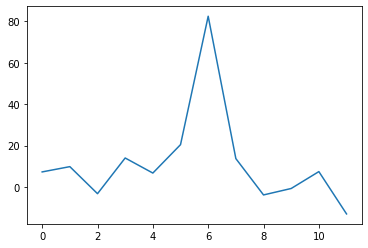

In [114]:
track_to_plot = 316
plt.plot(return_track_attributes.return_track_amplitude_one_channel(valid_tracks[0], track_to_plot, 0))